In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.preprocessing

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
## get data, just USD-EUR Close values
import readcsv
data = readcsv.get_data(cols=['Close']).astype(np.float32)[:, 0:1]
print(data.shape)

(18628, 1)


In [3]:
## scale all data into interval [0, 1]
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(data)
data = scaler.transform(data)

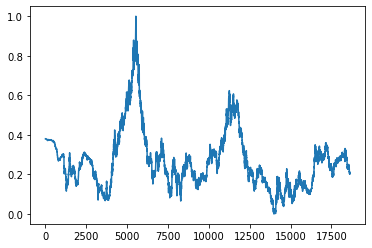

In [4]:
## visualize data
plt.plot(data[:,0])
plt.show()

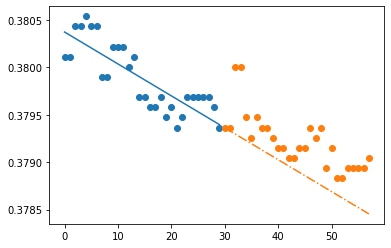

Average MSE: 1.577e-07


In [5]:
## Sample linear fit

## === changable params =============================
i = 0 # sets first day
learn_window = np.arange(30) # array of indices to learn from
predict_window = np.arange(0, 30, 3) # array of indices to predict.
## ==================================================

## ==================================================
Lcap, Pcap = int(np.max(learn_window))+1, int(np.max(predict_window))+1

actual_window = np.arange(Pcap)

x_learn = (i+learn_window).reshape(-1, 1)
x_actual = (i+Lcap+actual_window).reshape(-1, 1)
x_predict = (i+Lcap+predict_window).reshape(-1, 1)

y_learn = data[x_learn[:, 0]]
y_actual = data[x_actual[:, 0]]

model = sklearn.linear_model.LinearRegression()
model.fit(x_learn, y_learn)
y_predict = model.predict(x_predict)

mse = np.mean(np.square(y_predict - y_actual[predict_window]))
scale_factor = 1/scaler.scale_[0] # bring back to original scale
mse *= scale_factor
## ==================================================

plt.scatter(x_learn, y_learn)
plt.scatter(x_actual, y_actual)
plt.plot(x_learn, model.predict(x_learn))
plt.plot(x_predict, model.predict(x_predict), '-.')
plt.show()

print("Average MSE: %.3e" % mse)

# Baseline Tests

In [6]:
## calculate MSE plots

N = data.shape[0]

L_list = [np.arange(5), np.arange(30), np.arange(100)]
P_list = [np.arange(1), np.arange(5), np.arange(30), np.arange(100)]

streams = np.zeros((len(L_list), len(P_list), N-200))

for i in range(N-200):
    
    for Li, learn_window in enumerate(L_list):
    
        x_learn = (i+learn_window).reshape(-1, 1)
        y_learn = data[x_learn[:, 0]]
    
        model = sklearn.linear_model.LinearRegression()
        model.fit(x_learn, y_learn)
    
        for Pi, predict_window in enumerate(P_list):
        
            Lcap, Pcap = int(np.max(learn_window))+1, int(np.max(predict_window))+1

            actual_window = np.arange(Pcap)
            
            x_actual = (i+Lcap+actual_window).reshape(-1, 1)
            x_predict = (i+Lcap+predict_window).reshape(-1, 1)
            
            y_actual = data[x_actual[:, 0]]
            y_predict = model.predict(x_predict)

            mse = np.mean(np.square(y_predict - y_actual[predict_window]))
            scale_factor = 1/scaler.scale_[0] # bring back to original scale
            mse *= scale_factor
            
            streams[Li, Pi, i] = mse
            
for Li, learn_window in enumerate(L_list):
    for Pi, predict_window in enumerate(P_list):
        L = len(learn_window)
        P = len(predict_window)
        print("Learn=%dd, Predict=%dd, Average MSE=%.3e" % (L, P, np.mean(streams[Li, Pi])))

Learn=5d, Predict=1d, Average MSE=3.701e-05
Learn=5d, Predict=5d, Average MSE=1.449e-04
Learn=5d, Predict=30d, Average MSE=2.253e-03
Learn=5d, Predict=100d, Average MSE=2.141e-02
Learn=30d, Predict=1d, Average MSE=1.059e-04
Learn=30d, Predict=5d, Average MSE=1.667e-04
Learn=30d, Predict=30d, Average MSE=7.643e-04
Learn=30d, Predict=100d, Average MSE=4.457e-03
Learn=100d, Predict=1d, Average MSE=3.192e-04
Learn=100d, Predict=5d, Average MSE=3.759e-04
Learn=100d, Predict=30d, Average MSE=7.941e-04
Learn=100d, Predict=100d, Average MSE=2.572e-03


/Users/xloxk/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


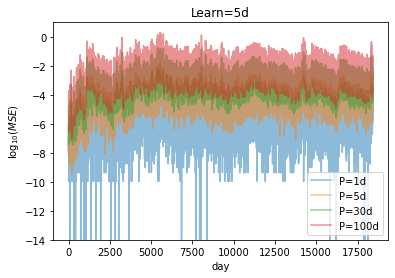

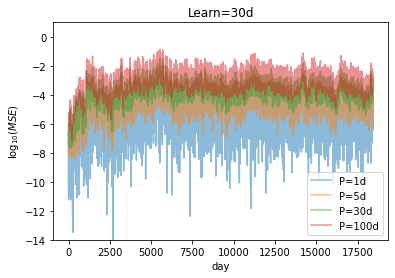

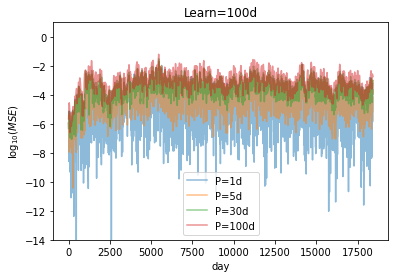

In [7]:
plt.plot(np.log10(streams[0, 0]), alpha=.5, label="P=1d")
plt.plot(np.log10(streams[0, 1]), alpha=.5, label="P=5d")
plt.plot(np.log10(streams[0, 2]), alpha=.5, label="P=30d")
plt.plot(np.log10(streams[0, 3]), alpha=.5, label="P=100d")
plt.legend()
plt.title("Learn=5d")
plt.xlabel("day")
plt.ylabel("$\log_{10}(MSE)$")
plt.ylim([-14, 1])
plt.show()

plt.plot(np.log10(streams[1, 0]), alpha=.5, label="P=1d")
plt.plot(np.log10(streams[1, 1]), alpha=.5, label="P=5d")
plt.plot(np.log10(streams[1, 2]), alpha=.5, label="P=30d")
plt.plot(np.log10(streams[1, 3]), alpha=.5, label="P=100d")
plt.legend()
plt.title("Learn=30d")
plt.xlabel("day")
plt.ylabel("$\log_{10}(MSE)$")
plt.ylim([-14, 1])
plt.show()

plt.plot(np.log10(streams[2, 0]), alpha=.5, label="P=1d")
plt.plot(np.log10(streams[2, 1]), alpha=.5, label="P=5d")
plt.plot(np.log10(streams[2, 2]), alpha=.5, label="P=30d")
plt.plot(np.log10(streams[2, 3]), alpha=.5, label="P=100d")
plt.legend()
plt.title("Learn=100d")
plt.xlabel("day")
plt.ylabel("$\log_{10}(MSE)$")
plt.ylim([-14, 1])
plt.show()

/Users/xloxk/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


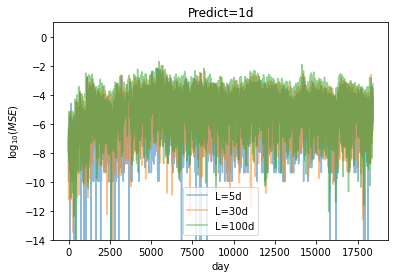

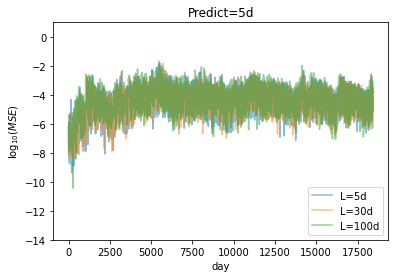

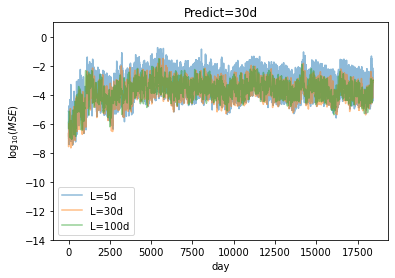

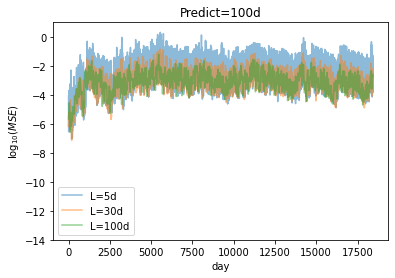

In [8]:
plt.plot(np.log10(streams[0, 0]), alpha=.5, label="L=5d")
plt.plot(np.log10(streams[1, 0]), alpha=.5, label="L=30d")
plt.plot(np.log10(streams[2, 0]), alpha=.5, label="L=100d")
plt.legend()
plt.title("Predict=1d")
plt.xlabel("day")
plt.ylabel("$\log_{10}(MSE)$")
plt.ylim([-14, 1])
plt.show()

plt.plot(np.log10(streams[0, 1]), alpha=.5, label="L=5d")
plt.plot(np.log10(streams[1, 1]), alpha=.5, label="L=30d")
plt.plot(np.log10(streams[2, 1]), alpha=.5, label="L=100d")
plt.legend()
plt.title("Predict=5d")
plt.xlabel("day")
plt.ylabel("$\log_{10}(MSE)$")
plt.ylim([-14, 1])
plt.show()

plt.plot(np.log10(streams[0, 2]), alpha=.5, label="L=5d")
plt.plot(np.log10(streams[1, 2]), alpha=.5, label="L=30d")
plt.plot(np.log10(streams[2, 2]), alpha=.5, label="L=100d")
plt.legend()
plt.title("Predict=30d")
plt.xlabel("day")
plt.ylabel("$\log_{10}(MSE)$")
plt.ylim([-14, 1])
plt.show()

plt.plot(np.log10(streams[0, 3]), alpha=.5, label="L=5d")
plt.plot(np.log10(streams[1, 3]), alpha=.5, label="L=30d")
plt.plot(np.log10(streams[2, 3]), alpha=.5, label="L=100d")
plt.legend()
plt.title("Predict=100d")
plt.xlabel("day")
plt.ylabel("$\log_{10}(MSE)$")
plt.ylim([-14, 1])
plt.show()

# Comments for linear regression
- good at short-term predictions, but bad at long-term predictions.
- for short-term predictions, equal performance on all learning windows. For long-term predictions, larger learning window performs better.

# Goals
- make a model that can make better long-term predictions

In [9]:
print("Best MSE")
print("Predict=1d:\tLearn=5d with MSE=%.3e" % np.mean(streams[0, 0]))
print("Predict=5d:\tLearn=5d with MSE=%.3e" % np.mean(streams[0, 1]))
print("Predict=30d:\tLearn=30d with MSE=%.3e" % np.mean(streams[1, 2]))
print("Predict=100:\tLearn=100d with MSE=%.3e" % np.mean(streams[2, 3]))

Best MSE
Predict=1d:	Learn=5d with MSE=3.701e-05
Predict=5d:	Learn=5d with MSE=1.449e-04
Predict=30d:	Learn=30d with MSE=7.643e-04
Predict=100:	Learn=100d with MSE=2.572e-03


# Direct comparison to RNN

In [6]:
from rnn_helper import *
#test_rnn_helper()

In [12]:
## split into training and testing sets
## take 100 random windows, 50 for validation and 50 for testing
## all other non-overlapping data goes to testing.

learn_window = np.arange(100)
predict_window = np.arange(0, 30, 3)

#learn_window = np.arange(30)
#predict_window = np.arange(1)

N, C = data.shape
L, P = len(learn_window), len(predict_window)
Lcap, Pcap = int(np.max(learn_window))+1, int(np.max(predict_window))+1
M = N - Lcap - Pcap

np.random.seed(999)
test_starts = np.random.randint(0, M, 50)
val_starts = np.random.randint(0, M, 50)

mask = np.ones(N)
for i in test_starts:
    mask[i+learn_window] = 0
for i in val_starts:
    mask[i+learn_window] = 0   
mask[np.arange(M, N)] = 0
train_starts = np.flatnonzero(mask)

print("Training size:", train_starts.shape[0])
print("Validation size:", val_starts.shape[0], "...", val_starts[:5])
print("Test size:", test_starts.shape[0], "...", test_starts[:5])

Training size: 10759
Validation size: 50 ... [ 1286  7103  9451 16503 13300]
Test size: 50 ... [12636 13157 16865  5832  8417]


In [13]:
#learn_window = np.arange(5)
#predict_window = np.arange(1)
learn_window = np.arange(30)
predict_window = np.arange(0, 30, 3)

N, C = data.shape
L, P = len(learn_window), len(predict_window)
Lcap, Pcap = int(np.max(learn_window))+1, int(np.max(predict_window))+1

actual_window = np.arange(Pcap)

## IMPORTANT! use the correct offset
#offset=25 ## use for 1-day prediction
offset=70 ## used for 30-day prediction

stream = []
for i in test_starts:
    
    x_learn = (i+offset+learn_window).reshape(-1, 1)
    x_actual = (i+offset+Lcap+actual_window).reshape(-1, 1)
    x_predict = (i+offset+Lcap+predict_window).reshape(-1, 1)

    y_learn = data[x_learn[:, 0]]
    y_actual = data[x_actual[:, 0]]

    model = sklearn.linear_model.LinearRegression()
    model.fit(x_learn, y_learn)
    y_predict = model.predict(x_predict)

    mse = np.mean(np.square(y_predict - y_actual[predict_window]))
    scale_factor = 1/scaler.scale_[0] # bring back to original scale
    mse *= scale_factor
            
    stream.append(mse)
            
print("Average MSE on test data: %.3e" % np.mean(stream))

Average MSE on test data: 5.435e-04
